# SHAP Interpretation Report: RANDOM_FOREST
This notebook provides a post-hoc explanation of the model's predictions using SHAP SHAP.

**Model Architecture:** RANDOM_FOREST
**Analysis Context:** tabular
**Dataset Scope:** subset


In [1]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Data provided by the explainer
all_shap_dict = {0: [[77.80867040804125, -35.06979199776083, -0.4503119993360173, -0.4377500015940062, -22.243568234054006], [-103.53604204639228, -8.8954990850515, -2.8639604525292355, -1.654784577795225, -19.15933883071032], [-109.23457399577839, -31.07600128019682, -0.8181051746685175, -0.4194942767797956, 30.07912177858672], [-115.60874937163922, 4.417964442534876, -0.48840761280953104, -0.17424541096314436, -19.31273310997335], [487.28244921064294, 1.3506819814567315, 0.44960204906098644, -0.4191236830893954, 16.189576001544975], [193.0793449559972, 22.409601387693105, -1.7965217005170482, -2.431757904950735, -10.868021480111246], [-157.7290294880966, 11.316529204003206, -0.2749787482233177, 0.5423054560572657, 30.286680815950525], [110.0945706144971, 40.89221556604946, 1.3189460353232465, 0.2950580679663402, 2.0484175541800096], [25.579492581919947, -1.0852005246357512, -0.6606268728262251, -1.4323433516195851, 19.15758071674761], [-394.44938733072115, -2.833513510365391, 0.44673198110693474, 0.732149699926858, -8.370135757835067], [-268.695661494063, -4.359079469721121, -0.5429208414500896, -0.8114003582948518, -20.65385828623549], [26.045994914159348, -15.775090346757835, 0.2571966478964493, 0.7478713893423865, -26.59775927923385], [450.46484102388877, -27.696211376926236, -0.5925424877867363, -1.3888761612953517, 2.6443054544917928], [-107.41771809404838, -5.546065424246077, -0.6981215468666159, 0.6147459303938047, 28.33713046047113], [-199.8929659187057, -40.12100915659451, -0.4846624961638451, 0.08861031330102913, -26.590712964356626], [-28.033834007010995, 8.566099581767858, -1.0241712499121343, 0.444580159275758, -24.08694056668928], [-195.71066967785686, -19.014730049702973, 0.2554168379634302, -0.2241458843319755, 30.104289416017835], [-124.66718322785111, -14.125265353279419, 1.6138531750482878, -0.21403576650844017, 34.61354142370352], [-55.33910707932377, -11.76087192676846, -0.27079665995964386, -0.6245944628105534, -21.791478715093845], [-276.6796535242602, -5.040910720689511, -1.7725318485375066, -1.0676811577758862, -21.38468439952309], [192.97729368822846, -4.803518516475008, -1.2503464331379377, -0.43471245180229967, -0.5552025495859678], [-288.9406289217556, 25.511434945995106, 2.8210648057528065, -0.9441069974122253, 24.360388302414606], [-323.1237281093099, -11.39250574563837, -1.0932665734705242, 1.0735210500118715, -19.37878437055074], [7.2202515947737425, 7.394178925453011, 0.5934333025364826, 1.098371433528962, 34.37836500479447], [181.96752064285894, 33.660591870576354, 2.853985281434967, 1.050249229203152, 15.210102990880943], [-16.27700496963602, 7.727787339599394, -0.5340639497155059, 0.3714387189545133, -24.742573552133162], [-83.49679072632594, 0.36506316812593337, 1.243678377838325, -0.43721672165200004, 32.40107716777614], [-134.98941725081482, -13.987898550623148, -0.44531218846309645, 0.5088356729717355, 31.137193530764602], [-172.8674435709265, -5.91461905937096, -0.2815421865344791, -0.8504385247730145, -12.928223096347926], [266.4705514445789, -13.672220196352525, -0.40578627809779777, -1.6616911917513042, -24.6745008229401], [39.79918983344148, 1.1004644343285848, 0.5662529974890207, 0.4130541421329834, -2.940455441921305], [-136.0690931383546, 1.9830543562828387, -0.015737901122148363, 0.11320644579527837, 27.47191899505982], [-213.2498080148391, -37.074854172310545, -0.47225305561946573, -0.804746430184036, 27.095632713798505], [110.6212798000422, -3.5960242646475753, -1.3231544116327418, -1.2449165743836486, -16.238422778999134], [269.4920595956475, 15.168597479024148, 1.8812849818411932, -0.3727908399353233, 12.322136641796824], [238.0895689437706, -11.201910098210744, -0.8411887612717807, 1.477379184871507, -15.662675835161425], [-247.92014365922026, -11.791687716540846, 0.7247698631536856, -0.17781219697755524, -17.40677591883317], [-137.16159472917468, -25.75501081117765, -0.34199583591287575, -1.8229089470348727, -15.667533216307918], [-166.90876298906764, -31.687356332098698, 0.24130492628696812, -0.7809614262942196, -15.223105507199982], [-108.90253331613033, 12.437241316728798, -2.0476240423459244, 0.5310029702086874, -17.777918750019083], [201.8433671594087, -2.4326647614492742, 2.846845533087945, 2.7643322695202777, 25.59456417395164], [373.85515982307925, 10.892636449214574, -0.2644701400803329, 0.029189321556771643, -10.233027194238861], [37.34442837734323, 28.15020688964854, 0.24905102498799675, 0.9953398196669556, -23.637315338646136], [-205.33137326235374, 14.443395569909253, -0.027936464201703176, 0.0030736412658372483, 16.465983485992634], [-78.58038625938086, -9.693972925684328, -0.870314809171918, -0.18160312238958776, -18.86857459671922], [481.407822908982, 1.2848010151699898, 0.023175600222439124, -0.10330016171665665, -12.188075141283566], [-20.084430540441197, -13.048088659650507, 1.6278279094223331, -0.06755819288226915, 33.20977563310981], [-131.86667285968926, -13.437012751709988, 0.3389809032300894, 0.9089713081572339, 27.48048465353606], [-115.85399184009712, 1.4393375188088335, -0.33281291541491587, 0.6155859930740337, -20.379252971429395], [34.097364382934636, -18.923368591092316, -0.008290145099728547, 0.4154059571392637, -25.047758074130936], [-246.05936053392466, -37.780606861739024, -0.4602287229306976, 0.3398577340854817, -20.975514140471137], [-165.69196756558821, -14.033694105558133, -0.5387125260575727, 0.45341509699169896, -21.59688065524083], [226.101387589445, -10.324401732094312, -0.01305789808511134, -0.6228678270874428, -18.973366464710136], [35.530883416889566, 29.65857623461684, -0.08027606047611716, 0.9647023598559799, -22.136309092062607], [-28.254780767495607, -8.105629620875938, 0.3049311831437305, 1.2099073290221634, -21.207409167904487], [242.66053459278496, 5.703967757793022, -0.06450220311472843, -1.6262862020876352, -18.697945714771347], [-206.33677774912047, -1.4208253384911345, 0.046366434678897214, 1.1407281708570347, 27.688347646071772], [-128.61224617426802, 27.107708407166292, 0.5408595860129025, 0.2224588442737601, 26.023755147207574], [31.91550064603665, 20.860634174543783, 0.018538642980864623, -0.14786736765256353, 21.49323227440358], [34.361001976186806, 25.656728484531875, 0.14041855602783668, 0.2504571112411008, 37.494556513419035], [-330.9132612350698, -27.198421327797323, -0.3737607944138146, -1.4615724251643887, -18.28770041389198], [-141.4264341229956, 6.138058671275544, 0.7803939222064343, 0.5212985936288359, -17.272048841601087], [-104.83629490319579, 9.29991405203601, -0.7899364030795492, 0.08365967946738806, 19.12706749316995], [54.90367927884238, 12.836643311080838, 0.1357542727419985, 0.23861977429020345, -19.927479087280126], [15.451211595363024, 10.637527083610244, -0.39100781989286393, -0.7752595122491196, -23.960426605874197], [-85.39678278679803, 0.7299446609352711, 1.2726204233917997, -0.18829850010235424, -19.365775635264814], [-405.41944401539115, -8.852181860016806, 1.171253962181743, 1.396956530693573, 10.061000982195306], [-70.86924337591796, -28.291014652851228, -1.5165152661746524, -0.16149864553115478, 14.839513927956553], [-25.77407711566482, -14.192677675677015, -0.20038848936080855, 0.026314687767036875, 15.505353766029224], [504.6825418528986, 16.98772900478811, -0.02318869175888604, 0.1539579361432841, -9.00761177671601], [-108.71975980742265, -10.919627195586244, -0.9241274793800696, -0.9804648337246381, -19.668740569921667], [40.25662804728951, -25.548720740804775, 0.294126406169583, 0.2168836368941413, 37.52721480379629], [319.5417763272443, 8.823674137813654, -1.3017959929080047, -0.9490200245068373, 24.66620416524568], [179.63505751849635, 13.68878452415132, 0.3733183533981781, -1.9144674349734365, -24.722230185719386], [423.9225810782462, 19.070570753337677, -0.06305270224257968, -0.33252321608313884, -27.354044361397385], [-331.02281467706393, 4.663223614024489, -0.3247635842780232, -0.9365019735028339, 5.0380569701948845], [-263.81551621138, 18.868723011858965, 0.22393677678872675, -0.08387354585237367, -16.396316377857374], [-177.8447299784508, 38.454819996542724, -1.2947477808639951, -0.06845764872134337, 12.597918833197165], [-333.9245955224258, -9.513963748619144, -0.2197176281216576, 3.395242064747054, 26.13886187060157], [-32.3380029968188, -24.325088387369377, -4.318518964000743, -0.1356075343630117, 26.124154286261344], [-256.4999885283965, -17.586142522694733, 0.5491875753437067, -0.7747060054634354, -18.375575348045437], [477.5002828616296, -6.423419327656981, 0.733897590740509, 1.0941342915040329, -18.511143960081696], [-215.48164589117997, 32.0885055127212, 1.1369289348678668, -0.17056014940638542, 13.182812437375139], [-140.96662676725452, 6.087506829662128, -1.295814461580418, 0.5981509077988052, -7.257519284863024], [195.30754829585175, 6.461214790027251, -1.433707123910708, 1.0359442035827733, 1.004282713180394], [-317.6106904609352, -37.145056897571635, -0.21218270202890638, -1.2481010550672875, -19.983288764935306], [-343.78716073668875, -15.87786545427844, -0.4330314676829352, -5.552688298919437, -15.164948915094858], [-17.4795575043973, -31.570368358610086, 0.670117961326936, 0.5834966125420455, -24.34521361770908], [29.804328576223362, 21.844493018931313, -0.04681534506786216, -1.1676809883235415, 29.984574617844036], [188.8627968982551, 24.09107417717498, -0.12116620234936645, -0.0759464474639265, -21.989121641077247], [87.39517871054092, 13.379419281268046, 0.2651281966918931, -0.18535872081071417, -17.532905333531545], [29.496867175575357, -20.62886353825757, -1.1282889130667144, -0.4626153488752009, 32.50382861336482], [-196.95267846798183, 35.9806809953501, 0.20264264206744587, 0.08271309184334988, -19.510972113057502], [11.445258908728364, -7.806101433447104, -0.5192854978923663, -1.2600772235033741, -25.53939274655248], [26.949230241791657, -18.191134421900095, -0.48607898444084446, 1.7660665729541898, 9.736403154516548], [-217.0640412287429, -20.084026094755306, -0.026059297581553505, 0.309306360023604, -24.442110239051924], [514.0963458739972, -3.9588767421450863, -0.07400957742434783, -0.2019741550064371, 2.990920692899604], [86.90406186131916, 2.3949284306430445, -0.40676001514061905, 1.4770749670791163, 28.97364836906226], [-252.6868631369961, -3.5124570785274924, 0.4067819539061124, 0.478450907791808, 19.718245807986793], [186.19548893130272, -24.294803145296633, -0.5218661644971738, -0.2676065876015888, 21.485090150694784], [246.29784631678024, 23.85209581013529, 0.09689927736353884, -0.25438076020963446, -15.719397419273738], [54.47832561935548, -0.6870633465479237, -0.169525381010688, -0.025952996422988477, -22.62045184953042], [-126.08350996899412, -20.19808115729957, -1.342827584591614, -0.8802474690883114, -24.055576646199345], [-224.6761018196092, 18.53719227349748, 0.11870545635780559, 0.40660286073197893, -20.293830913141885], [-89.31647953843128, -25.008972424498705, -0.4125113378745043, -1.444172962657893, -20.09983261109555], [41.11549519937813, -26.944916617515513, -1.223383261063819, -0.9410771223531676, 24.97156777633165], [-48.52410765108569, 17.9320996466135, -0.19422097074735198, 0.043498150456531604, 15.423545306065503], [455.5365025330594, 23.066245202512825, -0.11409383923865339, 1.1001767301427028, 29.426345748597814], [119.43573883443136, -7.749578909115335, -0.620139230117445, -0.18595204776028307, 17.232024441765414], [-245.49410285712813, -2.626372969542372, 0.2937034662638916, -0.2717932606596036, 16.72007198308576], [-275.00592899226456, -18.02781755489479, 0.07801099951015375, 1.3315904420538602, -3.9179978191293476], [89.03185547988917, 3.4895931901519677, -0.540388950130238, 0.1426789669347376, -0.22357301835620366], [-111.32284682975258, -9.224775374299861, 0.556697964971452, -1.4312427865554942, 16.340917582958376], [146.23070692853284, -6.011050586217745, -0.5660445563528861, -0.7682097538059438, -20.425600155097857], [83.83020166276712, 6.151258711970719, -0.80087978251212, 1.3386256927445077, 28.964710078387398], [-91.11606220576783, -21.37171762180835, -0.7016833781442606, -1.3039000254478537, -16.865842731161617], [-249.53037516211992, -9.025933521827989, 1.117073788168256, 1.0212336078708533, -20.71629094530735], [-336.92549081490637, -23.785368112123216, -0.899907932541129, -5.041596837859426, 12.673191862247352], [11.55476624269086, -7.992535984201939, 0.23342794468074346, 1.1092559060333462, 35.670128799141246], [-314.12494454820063, 0.30078212972949575, 0.08509966978801242, 1.6007441115914076, -16.24099705800245], [-249.16158226946874, 1.693033257108608, 2.0626062094937883, 1.8509901163566433, 26.438035049609656], [-13.375462699852653, 7.998977506453333, -0.3602218296533755, -0.8851331851591273, 12.995970459818642], [-33.09517695754882, 20.806015159841223, -0.055529123827793556, 0.11621946313022512, -21.82235625484644], [-290.8275337525636, -27.5644445508202, -0.450173882505011, -0.8348372826750405, -19.610425012064262], [276.41649750835916, -20.08742209454653, -0.1671442040667334, -1.9634862728295894, -22.46892329339906], [265.41131139713826, 7.461136750199308, -0.37332648186953676, 1.7868367601178443, -21.507280452330352], [79.69212699879674, -40.07692427047838, -0.39473355564567214, -0.34229543728324063, -23.311414032030278], [87.30813022780556, 4.996636492146873, -0.27860224182501897, -1.5644001256456637, -19.390128877357995], [82.1675838252159, -24.28395197828149, -0.5838336219336354, 0.23082470763976154, -1.2249017820188615], [245.5969805931097, 27.37911691266243, -0.3642895120293181, 1.7414923942627936, -15.725203151467976], [130.11691906459302, 2.661303390815801, -0.24177537714208458, -0.10848915095793542, -14.306714600481452], [-229.0437524774116, -6.848867304075763, -0.9432737024559918, -0.7904651858717063, -19.999831444152143], [-93.79428679765809, 35.05340930664644, 2.179635903917314, 0.7650805634398183, 31.55645650644717], [507.637580927296, -8.20839064067385, 0.5119115152012833, 0.3444271542340673, 12.566877136261997], [-387.9738083431146, -15.31890920086563, -2.10597154266806, -6.307330502680628, -10.705137571143482], [-158.09524436859203, -16.921618139208643, -0.570407480605768, -0.0808782195563723, 32.79659227437309], [291.58583433995364, -12.001998007204634, 0.6778459233131373, 0.3667548142364944, 30.81442399770974], [-209.22426065938973, 5.572526722793223, 0.5296291831344345, 0.2888966700681007, -20.82102179728007], [133.9942835609428, 6.238695432399129, 0.019792443444070194, -0.19777341161790296, 13.198619480641074], [-19.572484209324518, 19.954838355577504, 1.9961815726952856, 1.5489164386852885, 34.51037773937788], [-204.27507964340109, -33.63164283403509, 0.8166943248128269, 0.5073336851897968, -20.37957006781188], [-406.66049945058495, -2.890951095967193, -1.066783808365834, -4.894921897409212, -9.356559735641277], [-18.389735637746394, -22.476195086585196, -1.5668137332081897, -1.2396578610381124, 2.364960900523366], [-220.90914073658178, -3.339438410470491, -0.22841552185687003, -0.46046300494217035, 30.50676773667612], [-83.09946909999269, 37.54207153926571, 1.1301276240957154, 0.44974854932839475, -14.942257711425796], [88.37683619311657, 6.596611181742787, 0.3048592978811826, -0.2659374228234035, -18.892447710905184], [214.52217928312487, 16.07077433627276, 0.5299907089995258, -0.3154277571579723, -10.811529572332255], [-155.2432956904003, 37.45482401416037, 2.356763426870203, 0.8345472739575122, 15.674262402252461], [-205.02469410582995, 20.234700972621873, -0.6138796327853753, 1.2865172157755975, 3.2928596415555287], [-319.9463148963114, -6.383184600819833, -0.1805107026334031, 3.3018079204138173, 28.241533788213196], [230.97984783695028, -23.138530762659023, -0.4000663988809671, -0.7667486262179984, -22.706507139351658], [520.7282959937426, -0.4705674858372788, -0.18402605580305995, 0.3044031234428474, -7.525699483229031], [270.4117043883947, -9.516194222980312, 0.13206483342929654, -1.6066166828638728, 20.93157261358153], [351.1529565919398, -22.921304258011848, -2.345186550322375, -1.0140633830999628, -3.4919231919229876], [-205.5686158541426, 6.329153112350782, -0.03969752761763795, 0.33389941862669203, 25.417488511823592], [84.84088682430873, 6.482567487527151, -0.25748939837271334, -0.19341514229398607, 0.5957344898157217], [194.4245656738507, 25.4191817637505, -2.1319587082967817, -1.9266218462403828, -5.038590795342015], [-450.04181477480665, -6.755076970872155, -2.107401118872371, -3.354914522680423, -6.790325242602572], [-266.89094666156876, -1.4420426952307996, 0.9742147794739877, -0.39147132250064415, 4.719819852473702], [509.1551565453831, -7.740428847572835, -0.2653659979879855, 0.2736499027905428, -11.832603424527324], [-320.2250307213948, 23.087581751953135, 1.1047284105761275, 5.929291080475475, -15.332046650138805], [437.88680495080166, -3.4214531676227438, 0.5314209950879727, -1.7502113309937573, -22.109341839822534], [-325.5094928339586, -12.453088489484742, -0.20707303865668047, 3.8382444445074704, 30.367438764946172], [-268.11441263317784, -2.9743211378444667, -0.5729244979496164, 0.9022900560570043, -18.1636396767668], [85.07891630805138, 8.229174823290021, 0.12891341799596143, 0.12843143652953193, -0.10556377237926756], [-22.476866288225395, 8.977964349645754, 1.6917226930913423, 1.1344379390527533, -23.88288450996588], [-137.24606779745105, 20.74985547528238, 0.9493882097054606, 0.3883780589678053, -16.09039309574374], [491.95468931865486, -13.039540925114403, 0.11085375338715875, 1.3188586884035904, 25.891471958056187], [-314.72158386102916, -13.220690965518958, 0.025208986065425765, 0.5220459109715068, -17.12780179422616], [-104.59793479076129, 7.472953733911414, -0.5256728424751891, -0.2874290841750915, -20.564540121015124], [121.39852865377047, -8.669403865734722, 1.340891763917001, 0.05119410018789343, 35.68688838471912], [22.19460716855775, 5.75387173737985, -0.07078193749116929, -0.24890387306433026, -24.198715833912676], [-206.72452393661285, -40.908471403836025, 0.6636350476307873, -0.432299464949562, -22.158134525542], [-176.7610416368957, 39.55068204990446, -0.05790402555878028, 1.4592138675974426, 32.24557852171197], [199.9856859991468, -9.164964516184272, -0.05219097940141622, -0.7153776490408308, -18.783285092274408], [219.92299984400097, 21.961718295652368, -0.13689927279567218, 0.2964333343518145, -22.69673353692923], [43.4790590269409, -6.196566814256359, 2.7581467186615214, 0.3105884460774718, 39.08715731452653], [-239.5544666711971, 4.49841778680983, 0.3002797498433255, -1.0148310611373552, 3.49634908171444], [-164.46477771170706, 39.39178782656372, 2.774572760781321, 1.5508325155146714, 36.224411887557686], [-58.16484965625144, 24.851263771449208, 0.131005777613907, 0.33479637309290844, -17.495361857300896], [-33.32275125137228, -5.94256104964352, -0.23097589397578563, -1.757515476834256, -24.419988268874185], [99.87666756801313, -1.0965250109756457, -0.058760460967504015, -0.04134534867233375, 10.803176528657737], [-107.5460074895096, 17.11549425660386, 0.5593706699511796, -0.03235796241616504, -17.84387731060415], [194.88925739787155, 26.27710118033676, -0.44626800086913443, 0.95749044551301, -19.442543996069883], [201.47552316632724, 4.297146867088722, 1.2203579077821098, -0.26297066887159926, -18.851600784323235], [364.2072654444193, 27.95527142181949, 0.9959158832439772, 1.3507452978028491, 5.742599984871187], [-44.70595859652109, -1.5639230488821187, 0.25884245435627845, 1.4327386224298395, -24.71852440260213], [39.876044766090935, 18.40334781365676, 0.002092571987392402, -0.46504717690011266, -2.6527416567824025], [-95.6253090726077, 18.54688072616803, -1.1498472595209022, 0.8360191876303712, 0.310191167963022], [-235.54688601083018, -8.841456239157118, 0.47418241426677865, -1.2209240698960795, 15.088579776970281], [504.37773851872356, -6.385127347228006, -0.0024831353853157975, 0.21704101626571246, 14.586259272986592], [328.43065135733104, 18.06461007241208, 1.3322223906389086, -0.6864000949755277, 31.465967223766516], [180.45585818878303, -20.702826827459234, -2.2085682133858184, -1.8375148094468907, -24.404664994655075], [-60.33174104917762, -18.543185757451617, 0.5696760627227498, -0.8131839441226029, -22.304634545507362], [-257.0570963447414, -13.296201062630947, -0.9696286572672379, 0.4098560148170392, 5.736423656780257], [252.34786948088126, -8.606473088551382, 0.9657469111053737, -0.508613379503379, 16.186099334193738], [-97.54783160221179, 15.18005194300765, 1.405845540138888, 0.3356269459269221, -13.986981467339286], [69.3482409837188, 9.96340251043937, -0.1394800268786647, -0.29755234584900314, 23.741842346884145], [-179.73457914889477, 11.593346227199731, 0.2043160195364422, 0.1078874171802123, 20.33663144703596], [21.27051942343741, 10.158052153418975, 0.502180827313712, 0.8737473639709292, -22.462091125045223]], 1: [[-0.12496737018560276, 32.59426416974848, 1.1870165435270887, 0.7147373780101876, 29.12286089435204], [0.8060864517623999, -6.892223113711108, 2.4527872279844214, 0.7661044170333832, 21.219134780339658], [1.3298240207632712, 57.973694984405476, -1.7627627116305424, 5.232900260748923, 29.80781799648312], [-0.15977737684969726, -18.632878512864938, 0.24359484764752518, 0.16560074100791045, 15.870808330695866], [0.22251988636794012, -19.982804532975603, -0.18324866046513952, -0.7335542472118335, -20.28874141186733], [0.6679435825920619, 12.432066369667538, 0.47935275041372194, -0.21712818887449414, 19.241738093310524], [0.3951900862493885, -18.16347932620693, -0.2786567160393513, 2.318569178633791, 35.37678720706891], [-0.4051052582806063, 31.55185377034449, -0.27589216839638364, 0.17638304149347675, -43.43256399343663], [0.46392831704370663, -13.554423010535507, -0.8259152878925463, -0.13041767238863286, -7.690954696345582], [-1.7902757095209234, -14.855017636060142, 0.305326606818465, 0.25977605332046466, 25.506544548085053], [-1.6151461959336104, -11.240050563783539, 0.6418156845895862, -0.29402535868919105, 23.655236264585717], [0.4738531190981474, -8.493644781728378, 0.8196318006332143, -1.117185758795741, 26.80846557270889], [3.1478825873084975, 59.95780465629105, -2.997570311269535, 0.5591878860508103, -14.619318341265753], [1.8870180964372445, -5.393486692445322, 1.2741255734561476, 0.8863240914701521, 8.331652311076086], [-1.221275648971321, 54.11766765094862, -2.5300898115059285, -6.581461030246665, 14.590919350095199], [0.11590747816482748, -16.80746631566683, 1.2258321549347484, 0.09126446689979974, 27.659316626042905], [-1.2874784532470092, 19.880708461145606, -1.313795785968108, -2.4382973160089616, 25.518633834447613], [0.3514607897574737, 15.177405807954827, -0.1169403547458131, -0.23244031143996727, 33.85231165919561], [-3.3935953596647064, 5.190740886898198, -0.4828704555094976, -0.3613350862370248, -35.736648330136575], [-1.6388069480327558, -11.233069382872731, 0.6383323526015824, 0.25642694764621, 27.567816927044905], [-0.208457819915236, -14.611786955276388, -1.1554254001719142, -0.03155245570980094, -42.296129490615485], [-0.7175913081588553, -6.085960857984113, -0.5840850910687584, 0.330001255928444, 28.79981393581568], [-1.1095390398321014, -3.2379356790900897, -1.8844914547989855, -0.07284772688533651, 20.791651620362476], [-0.050284892895438284, -19.72646871317635, 0.00657622815838672, 1.4666829283322984, 34.419677056261776], [1.353636624115604, 31.066487414312217, 2.240264898564493, 0.1584811576601216, -17.372696855332766], [-0.3127564211765401, -19.244690149545267, -0.10460727873079409, 0.1489323883814721, 27.604949976800654], [0.427284203128342, -14.539604549310408, 0.23263475081764834, 1.0353192750340843, 33.9230849102349], [0.6874897990054524, 13.187952733055187, 0.06974638018276977, -1.558283833620523, 34.83442507582002], [0.003653096994569377, -10.07265270352714, -0.6663135654736821, 0.09565027141376524, -47.25867675115719], [0.2860462447496962, 14.542658763116114, 0.182263553717961, -1.5240664882679846, -14.256997345257787], [-0.031042693684845146, -13.936924413697618, 0.2051475401346369, 0.762959130855564, -44.85440159218492], [-0.464114035943023, -18.790290075210336, -0.2832001542411288, 0.13322229247954886, 22.00446875446362], [0.7456307710345897, 68.4517853974895, 4.587976153635338, 4.521733492193252, 35.23036647898962], [-0.017811592837713965, -13.951676173308675, -0.19737303216735616, 0.04626757392524638, -43.482240299466575], [-0.1725791901656309, -8.221855682993425, 1.0481265058416225, -0.2210511518807111, -44.630326348488055], [1.4225671368409332, -6.657925465967777, 4.831132308919027, 6.759803986120754, -6.4767771319622645], [0.3827060431420691, -5.094152007820617, -0.7084500611710329, -1.1691066344895245, -22.110173536083927], [-1.1768156718180047, 13.594999463438713, -0.8824863998228708, -2.819847192689715, -57.95617242370154], [-1.0401894819135098, 56.751990786417686, -1.6702880443437012, -5.821354804277269, -33.079792885636856], [-1.0640121150910251, -17.713630072039738, -4.00737342674255, -0.3885641823676604, 11.652885082153206], [-0.07122777268033931, -13.643120918618893, 0.30843249218570806, 1.761472361101617, 35.46332093827089], [2.466756420778609, -10.939294748659893, 1.6590589932696094, 0.14941654489112727, -37.38330550249492], [-0.808274560877493, 0.7391588593374194, -0.3190573201333309, -0.993726588323087, -44.86213116952339], [-2.9329695074337403, -13.98690357595416, -1.1762881537337795, -0.9015166309344396, -3.341285644938376], [-0.21404704583359768, -6.888176191486146, -0.2349306054209285, 0.16127629221638365, 23.98493186989964], [1.489835689933501, -15.847450160963524, -0.1930286304383664, -0.15178049805409818, -42.69814595820895], [1.7376227629867964, 2.3623869840378533, 0.3635314018495321, 2.316632650705288, 40.356456575863405], [0.6068719994012416, 12.266143094511783, -1.5983578227082844, -2.226038209664943, 6.225570998533396], [-0.21292730898306367, -19.86348890024434, 0.21057201682556032, -1.7666420130501477, 15.231085748786892], [0.4669303771293952, 15.178893624881503, 0.01814241924708305, 0.17351536498212125, -32.89244273068073], [-1.729056531168522, 59.22514380129286, -3.638623536235362, -6.691283919167681, -35.79393619212779], [-1.2383052607251477, 11.818507939012633, 0.10024167271921763, -0.36583981243688574, 14.285337791331207], [-0.18049844836505827, -11.0392635523767, -0.9972532784723103, 0.1930445558084989, 26.532735036663293], [-0.8844359039860803, 9.683758260153507, -0.08850420491430036, -0.8575301509902479, 29.3127021633852], [-0.12132376873831069, -9.040581815113564, 0.10825252421615059, 0.28813991789076443, -48.194351583135706], [1.5220515888556008, -17.509368388558165, 0.6439040472801586, 0.12830205657681465, 29.117258362860657], [-0.630490329245876, -14.961394857666718, 0.3803100906430973, 0.403857036514543, 24.678961130372766], [-0.648477030241651, 8.098062441997143, 0.6910190418564763, -0.03955557528457039, 34.767737458551856], [2.3294743357815277, 2.693273489870009, 0.9159457360953338, 0.9784405724871498, -7.180701116499196], [-0.6334281168715612, 1.5914198198310092, 0.32226700807495556, -1.2531157244218463, 37.28209417210886], [-1.0795371547422206, 56.546779205411674, 2.1387977149640194, 4.14624633532677, 26.35977270992812], [-1.0233175719755596, -18.536458536509127, -0.15340683627273527, 0.21647053240265512, 16.095337883572427], [-1.5079596835152878, -15.819224194664034, -0.7680153737687893, 1.2840814841592696, -0.1859328784571369], [-0.37532501579511446, -17.895435290169246, 0.4195778525471895, 0.04606498154655095, 17.547979758267758], [-0.13144057018363167, -15.99368842228362, 1.1474844090020833, 0.2976070172063461, 29.588351591819745], [-0.26813941974731387, -13.774878374926704, 0.7772696427598936, 0.21903004976503343, 23.807021171653624], [-2.9157520012914344, 2.8303852318624565, -2.52600951084434, -1.8739790470885536, -22.24587650862696], [0.6131703950854676, 33.60771170242257, 0.6918240061396854, 0.5857248371233704, -17.979356426964735], [-0.1278107301183087, -0.7326724977292118, 1.2287860119183658, -0.3673352407062012, -14.725358573921547], [2.152327973569448, 40.88757519560554, 0.33070422508022745, 0.7185724611857066, 34.09625428958744], [0.32851378869173437, -4.443804200248306, 2.1626661208461617, 0.21984254878522258, 17.26945358023224], [0.6951423402372591, 53.160987098480305, 4.2640149221699, -1.5937545249989515, 30.394060658058578], [-0.031614613707836574, -20.55136078664527, -0.45671186008672227, -0.4138366934661183, -6.444293114050352], [-0.11721255500044675, -7.744214200153606, 1.4814755090364677, -0.4283503396523952, -7.871766408228364], [4.3339709387906185, 7.24090461800493, 0.2869501732020361, 0.3734785246598129, 31.297096075856594], [-0.1522062471571599, -16.327871608804607, -0.19401019607485628, 0.07169873896542227, -39.67440149077648], [0.9182700421990131, -12.513921060257319, -0.941092651105911, -1.6289085676623636, -14.645517504968415], [-1.1699053381608044, 8.287422307513951, -1.1031006863969783, -0.6078168353078639, -26.58093709364343], [-0.7891436992791498, 9.32492752909955, -1.915629992048037, -0.3877388171064663, 23.819218749529703], [-0.2726728201022047, 17.36297745021576, -2.278154728850732, -1.2721933307229445, 21.45391112052407], [-0.608077632264761, 17.857184842486287, 0.5498099615832075, 0.24257377230357346, -17.173486823963643], [3.858411303042423, -11.993612435600353, 0.11237310610702186, 0.22973728061365292, 30.319919450847504], [-1.7337087732261665, -0.684531203463844, -1.3862022021177955, -0.014576294775266715, -21.310335657180318], [-0.30193488506716853, -15.624023203623837, 0.5650859892859339, 0.38912713522027326, -41.45836749636194], [-0.28944779713751445, -17.267571318210702, -0.8979699901483961, -0.2223315572334108, -38.410597459384995], [-0.8420867759810774, 54.227129195196554, 0.3034183830087996, 5.4787007939573344, 24.827535669107732], [-0.21392944009344003, -2.5563616940866187, -0.38744541240018704, 1.3088146269265346, -21.947271822144124], [0.31718477976249804, 52.40601365278214, 2.1375094097654372, -1.4408923209333921, 23.237764458213586], [1.2718491800396254, -1.2323363292963374, 0.8837585595049481, 0.3020341374752666, 3.09608162790486], [-0.2609314779726592, 9.134099555361503, 0.8757876342987964, -0.22220108828557947, 15.965287685772745], [0.616208234254559, -14.186705001304423, 0.9358904489576315, 0.6435300974395307, 28.87664159201446], [-0.1028919910991006, 18.058795332500587, -0.3725464043444355, 0.2175996565536268, 34.69064685435617], [-0.7732766073488535, 9.096061116726425, 1.5391140062707966, -0.7187683517840331, -10.945641034440529], [0.07026055145687345, -10.981593325285418, -0.24536029109054874, 0.3261105108874207, 28.89763874717648], [0.009749395931365949, 21.998675418845682, -0.37238025044445966, -0.22135598036118487, -18.018980504049043], [-1.387100666086739, 18.147862065966386, -0.5985784725466086, -0.6901775318974303, -36.97222676855501], [0.19768563411320644, -7.62711332731248, -1.1374886933347275, -0.050345488127202756, -43.499236298015525], [-0.8148157730408873, -18.145773548931192, -0.9316412391504011, -5.902605573975259, 28.36501756337871], [-0.6287387964387114, -14.593136548543464, -0.804805592993134, 0.7251150242955964, -16.91605993204443], [0.03820314714171451, 28.632459037274028, -0.31631694893700935, 0.10142256570859903, 26.607286930769824], [1.5860468262905487, 0.18022811870212216, 0.015006328454694167, 0.49555801250797177, 26.57513081643249], [-1.206759790992954, -18.53566010404688, 0.012497862356574269, -1.1298263648775309, -18.9451434946661], [0.18167546709926782, 14.70269868659826, 0.8561459888715208, 0.5417501106782736, 32.97527616270069], [-0.38526386095481835, -5.26996850655625, 0.016592938209488366, -0.7189523160295823, -41.35667455082178], [-0.986962463058182, 16.59809453597807, 0.42702270041470275, -0.47840829780172706, 12.163624736971274], [-1.3239195895170672, 36.15535900808906, -1.3705702926239864, -1.8712883462214218, 7.117717586156573], [-0.8265966258171242, 0.4837099514987318, -1.21816855556669, -0.6232076737840275, -16.667796593068406], [2.3029318153356244, 29.32761453686326, 0.3029424840258516, 2.6775802609828774, 34.138895202965706], [-0.6768751448123509, -2.090454604770845, -1.4962309158885176, 0.5003534584776314, -11.30511027514354], [-1.0073389435982505, -16.1087604380313, -1.5621026661717459, -0.288164868181146, -19.621008961488553], [-1.1066645577295222, 19.768914415224273, 0.7426236251190081, 1.5260336030719752, -42.42536612195066], [-0.24445749747567058, -14.593206188989523, 0.14872128997587772, 0.12764313547401776, -42.98821335857515], [2.4069039013397355, 0.8961510717197279, 0.5240217208475032, 1.2422957553688831, -4.996179476302379], [0.07209449647652798, -11.443399267054245, 1.3297019151370248, 0.28488084254095575, 24.995426219274144], [-0.4956535221458996, -20.872845147881886, 0.03323818935781003, -5.567287585380681, 30.109933018784023], [-0.7787268625557343, 15.63874164228752, 0.168389959434998, -1.7390829501484195, -46.83670201560024], [-1.7438068970427791, -11.480197569727407, -0.7172163474300121, -1.1679617857268885, -38.86594806782508], [-2.4869689837818485, 43.983814542925096, -4.7882942538649695, 0.6041335605532818, -16.77240665740266], [0.38358859919810057, -11.373423340496082, 0.08361627661963754, 0.19725568821856326, 34.77080994015038], [-1.1354807592444682, -12.68465884528673, -0.07186091045133865, 0.04231820209013812, 24.317033137285794], [-2.696350534134225, -18.740270248659087, -1.432657560087617, 0.5751231720602458, 1.7776137533026835], [-1.158591383205643, -19.580276308823546, 0.42012531227245936, -2.0380387642120246, -18.519458025737197], [-0.9301568658643565, -11.030665882024529, -0.13816692759514432, -1.5485689838947823, -18.127777535084554], [2.7724240011346533, 34.82541028794375, 0.7960057074875722, 1.1064718127862072, 32.07776430154168], [1.7863732170821558, 28.325772148057858, 1.1993705586626673, 0.35824468890883043, 17.485958327277302], [-0.8684911213727955, -22.277462899672123, -7.514166964714497, -0.17454359900917868, 9.424449492415944], [-0.04149376765989427, 54.28028547832768, -0.6718054339048048, 1.8164171306608639, 19.719046990544047], [0.10682699556775879, -18.551784002829063, 0.7236424414401239, 0.10171096345982178, 27.811131659316107], [0.6138748779341767, 22.30832381798861, 0.5011896204872236, 1.8888647405519672, -42.4642373318429], [1.5689826740583868, 14.203192295015153, 0.7375126894213201, -0.02439280531846999, 32.96348032771004], [-0.8702345597436186, -21.676408923837425, -5.715835261527937, 0.2488780730823011, -21.210227360506504], [-0.5755428199940421, -11.579439619435744, 0.3218917412886949, -0.14144705436897012, -45.00081897177791], [-1.4886129349040358, 2.48134562524228, 0.0717584779924711, -1.5897858424288858, 26.4597859848797], [-2.649317202633308, 11.86397821222342, -0.599117422703312, -0.7664911898950918, -8.127708048794746], [-0.2269044462042401, 11.405043870112918, 1.5284503086702792, -0.6319538338122638, -43.107978093191974], [0.04929781992370086, 21.693138045058515, -0.16814424014278367, 0.322529830888993, 34.45310419915457], [0.8163515115970411, 17.059226974454152, 0.32840199885648086, -0.8121784916214958, 30.79480045947302], [-1.7857636799922367, -16.141421166039994, -0.04098156185649794, 0.20771749020171087, 27.69603552359218], [-1.4248710036614765, -21.895783429180742, -1.6737062722505796, -1.0961628809193302, -17.17812407892177], [-0.8908469986130247, -14.338765572631237, 0.2412753569361585, -3.8949348652231395, 18.742629857755293], [-2.6318907725419476, 51.9819915305024, 0.5139462538451036, -3.3780021124047424, 17.51799245989267], [-1.5138990548462283, -14.641868141097536, -0.5919028526599417, 0.6906986832867206, 26.279028466324853], [2.4172711378935436, 14.110187072617665, 0.8052165734404273, 0.5172571636962838, -56.765166202412054], [-0.34393214270782435, -13.339061773558486, 0.1741751355287708, 1.1542824189904661, 35.43617689539405], [0.026623775456272605, 42.568394949694046, 1.0962732807273974, 0.21677073822944323, 36.56932010455593], [0.27839773445456445, -20.333937305641964, -3.3856548135038906, -0.5743150755552585, 24.89959136853513], [0.340024600250902, -12.966851732207326, -0.01164647314212296, -0.4731064781387125, 26.176361291676148], [-0.4584089978403606, 14.220787209866133, 3.540379883730685, 1.512152179790998, -21.67218055759628], [0.1252124424335649, -4.196667660734589, -0.9440795222190064, 0.49969895708301865, -40.23307454673289], [-1.0083709539555532, -7.984021307018383, -0.11269019564385879, -4.961823082099188, 30.91215553996754], [0.5955229408389158, 20.506739527269662, 0.02533617768550259, 0.21767454508224054, 13.520462338696985], [1.100532321342781, -14.465154718973954, 0.13467693247818188, 0.3685278138231821, -44.39918375809899], [-1.160442728939163, 0.5750229267794613, -1.1282271770252843, -0.5815347503685295, -12.970674682130142], [2.961065654647737, 27.703363032149486, 1.2790961096003843, 0.9116044546006287, -43.626489774737614], [-1.0218472771650788, -24.224702432030558, -1.3486634368724373, -0.1543045195110606, -7.536470411388002], [-0.3320409304132916, -16.66679767044399, 0.2983818115184484, 0.10950434193694326, -40.882518863772546], [-0.7188104164937126, 10.892870743833837, -1.0465245466796493, -0.3949996141629149, -48.70546492521963], [0.2831865082586311, -10.409535433863189, -0.8639291597189368, 0.2868791700311765, -39.56649069297306], [-0.3744976208447283, -18.33770345401515, -1.1574052713602787, 0.013505227364798677, -37.987496728230155], [-0.6179161541133176, -4.042451257934161, -0.7294934914276906, -3.0507652657939643, -27.748677775194583], [-1.404432081600338, -7.531821920500305, 1.2428094198786592, -1.1744284575053279, -8.77087775648031], [3.4613235809931444, -13.969578055530446, -0.7639870435690717, 0.1921060279174238, 28.094937337543367], [-0.3564015815986437, 19.5461409168973, -0.6852596587612513, 0.9885829931279897, 34.05812692965186], [-0.15262615639049928, -14.451431840575351, -0.15730262001688736, 0.2739690890986426, -42.049995241004126], [-0.35010735914970836, -16.454604294521168, -0.14732903656463603, 0.5391017367114674, -40.93027204845179], [-0.03219516371488307, -19.241109959505913, -0.1752132699520869, 0.17970623080301054, 27.509084916779635], [-0.6916652264226608, -5.827639306449992, 0.569647454506312, 0.3454882406727177, -42.21425683602462], [-1.37474039849013, 23.473458505584528, -0.427516751025328, 0.8615553054983058, 31.04372422439982], [-0.30372565102269483, 13.80878757898292, -0.36709326263469777, 0.16709252462902333, 30.714724174447998], [-0.6785869128741306, -16.379063682109212, -0.44423388398822705, -0.28938572663918133, -36.974224970882275], [0.28990093174252585, 20.040252012526537, 9.657350852823015, -0.2496299661261547, 41.77342367570078], [-0.14146124505480767, -18.314614599052508, 1.298040509438151, 1.0228207293558318, 28.204620834849113], [-1.6189604149843413, 58.27660863430038, -1.6552470443668001, -2.248993779606899, -40.29045354435346], [-0.05622311951553231, 38.19223667858744, 0.20291316456646036, 0.02807130491540941, 29.155889413682434], [1.5669713890082693, -11.590610767058752, 0.4431598354340847, 0.879167052156409, -35.459723347541555], [1.6193936978998371, -3.3813142774309353, -0.5841763218735264, 1.5988820645885877, -39.674236724931184], [-0.18081575184112217, -12.160402598801731, -0.002809886928207783, -4.955165109652857, 29.876062926332793], [-0.29161974433838417, -17.172839198928727, -0.9514725025831023, 0.43269088223687685, -39.01671528904516], [-0.5163242239732466, 12.716919574119123, 0.3171327694545914, 1.345580267241535, 40.49211140370112], [-1.613061503178795, -3.8196663764017353, -1.262187524801166, 0.36687683610638505, -19.892786145959462], [-1.1526002206965253, -10.181104484378336, 0.5069218061432073, 2.9556320580759547, -14.092966672397344], [-0.3593577563820334, -14.840096642595789, 3.203184590845237, 0.4633617982831317, -14.70469004331647], [-0.6511163181376752, -2.6284977505448444, 1.2371996080046137, 0.07879050264485553, 20.09903583017474], [-0.12514530334877097, 34.6919596240587, 0.8722336149578643, -0.7142241197885133, 16.776404570609273], [0.5301443984021289, -18.260460243157965, 0.3269314964166817, -0.35066241776778334, -36.82477696874821], [1.5547082234883889, 19.461694522878005, 1.6776051669020993, -0.7746111699597554, -55.206172856107045], [-0.2441802872220801, -11.846412397691662, 0.38717636922906806, -1.0597952495829597, 27.938589482566556], [-0.42053113002449277, -8.696019881478053, -0.21832831329992275, 0.2275586279668008, -42.664119222619796], [-0.6808650165024046, -6.560464650317081, -0.399489649879606, -0.5670174964800446, -42.7138021933856], [-0.390812514549023, 0.35820038462756043, -0.679674676038654, 0.680991688710143, -8.597354056450811], [-2.2213632212799985, 7.48401551305913, -0.36620753485202606, 0.0687417211940628, 32.66932615451265], [3.336508501683884, 2.7154195285227116, 0.6329753446917957, 1.727942491259833, 39.28173467068614], [0.9754808256234326, -2.2522550479658596, -1.177291105088072, 0.3494398367508215, -13.085271913536825], [-0.7664508956721963, 11.776850315434602, -0.14070399016926943, -0.9353482654292876, 19.315101195478345], [1.3066791881529927, 6.944743773228935, 2.3404427800527188, 0.1693710027174239, -35.46533593379081], [1.4295375926645986, 3.6174366236805624, -0.19190870444246486, 1.208438565178104, -8.019158527409054], [-0.30232371085995086, -11.968565374386142, 1.8677839791223605, 0.06871648393428413, 17.851414257554218], [-1.6034289590780408, -18.52612590432173, -1.0514096931151824, -1.204354035852242, -0.7972841347768908], [-1.495374794210829, -16.155853246751768, -0.23427029105807864, -0.41281257881693745, -14.442643040551214], [-0.40659922878973287, -18.383437940817412, -0.048454678082221786, 0.16355488539431973, 27.573057103742713]]}
data_raw = np.array([[12.46986531894146, -1.0196581189716838, 501.80416486340994, 558.2364458113259, 16.0], [8.56518039405789, 12.434120698178264, 357.3621077718592, 473.2923326463841, 15.0], [8.057981983986418, -9.027539348996871, 578.136222236251, 443.093246566953, 6.0], [8.058067064067107, 19.242342597118988, 415.3353751133638, 447.73580424140994, 15.0], [21.581489780152378, 16.43339167606231, 497.5342719268506, 374.4680431466656, 2.0], [14.44258289250513, 29.790789734057604, 311.4233081245758, 661.9292330014695, 15.0], [6.898990264785775, 21.111436546495423, 460.61981315564935, 282.0065416773083, 7.0], [12.79043394562378, 37.90883924078763, 381.4139452869797, 608.5725781263167, 11.0], [10.78569077864016, 16.070423820787138, 267.8043582658189, 445.8323311989723, 2.0], [2.1127985356235093, 13.944699479976926, 554.1842089336317, 488.51137424510586, 16.0], [4.658842677983584, 13.15643349282904, 664.1159539091574, 442.24148301467335, 20.0], [11.247079790859598, 10.604112889682265, 612.9473589343946, 723.5037591570438, 17.0], [20.466286123270265, -7.077509163825688, 568.1690689903805, 551.9578722022932, 10.0], [8.101471454713808, 12.798053729920424, 458.5878832054455, 644.8454230051423, 3.0], [6.554864970172874, -5.678547264359924, 580.5890228547826, 706.0632230315207, 15.0], [9.981771535555444, 19.520333445857688, 622.3853198573728, 569.6086568826885, 16.0], [6.304090675529202, 2.5993970752941564, 513.6821829671293, 406.5251474973745, 8.0], [7.7634606462230575, 6.056673769115802, 381.5639827687977, 523.5228699861074, 5.0], [9.256402610779704, 8.305898051674482, 450.0615701408629, 460.9302383720557, 23.0], [4.499289394493837, 12.950649621867546, 670.2696488347937, 489.5795005735241, 19.0], [14.868089839798849, 15.06868254939037, 492.52558318498336, 538.6451448820853, 1.0], [3.950055574234145, 25.844795830730707, 200.0, 533.9013229489283, 8.0], [3.614215945155341, 9.224699064924462, 353.10765363298066, 599.4530993224344, 20.0], [10.504308039705446, 19.801461362223694, 457.5551296857519, 616.8765152536585, 5.0], [14.222210879971978, 40.0, 603.5825238417568, 533.9025788480251, 2.0], [10.347445740359149, 18.7735070276323, 472.6877647593088, 598.4162701729501, 19.0], [8.687829173184491, 13.195102110683662, 605.443165497326, 484.076817407747, 5.0], [7.715989329533742, 7.208483480717027, 447.3837646452511, 707.7735790715805, 6.0], [6.9403572975756616, 13.056684545796715, 303.5707477764387, 482.1386454138824, 0.0], [16.772825576657944, 6.137796563905942, 450.8438841401916, 693.6623781546914, 22.0], [11.31086503793848, 17.686614266837726, 534.4945001546286, 372.87194898739335, 0.0], [7.300874920064084, 16.03544138639393, 526.1950349341313, 504.3511291106985, 4.0], [5.974373094710684, -6.622192209177932, 374.4892250743365, 510.28261916636734, 5.0], [13.28402745376043, 14.814419942339324, 464.8803798196235, 583.4790153698169, 12.0], [16.553101649801405, 25.76146312640013, 768.4674238064074, 653.4180163862588, 1.0], [15.73198752207241, 11.0088814779725, 376.6731173703123, 400.0725756328567, 14.0], [5.311554286664757, 8.47103227588438, 566.0723394463748, 417.0420349548511, 14.0], [7.675238197283421, 1.2229922688314758, 290.3324301430205, 381.77103187405146, 12.0], [6.853766646414698, -3.5799204162440432, 586.3791824569662, 708.42210366381, 13.0], [8.311910022485725, 23.31349267063254, 410.7674609811553, 585.7125931356547, 21.0], [14.790118998973313, 13.18521670420804, 540.208825820294, 419.87545498514527, 6.0], [19.42887163677592, 22.720215620034228, 370.8474398231799, 496.82861512527154, 13.0], [11.55658711487171, 30.31323744579469, 529.0852800176707, 691.8113674793793, 23.0], [6.110396742312313, 24.212476849103453, 409.1349704258562, 516.6256923626514, 9.0], [9.130064236637509, 9.57627678561204, 428.4951817033375, 509.5374234650593, 16.0], [21.43620963367325, 16.448676646575553, 544.1986006395031, 456.24439518123296, 13.0], [9.83974118386102, 8.852271348430817, 456.9614523602984, 427.0009223417484, 7.0], [7.7265481745927165, 7.917115373983369, 538.0381448216311, 691.9988572531788, 3.0], [8.13326079812076, 18.42815162402624, 480.91586813566494, 750.8681906490472, 15.0], [11.526801200702938, 6.677061168818275, 506.7493681247275, 431.7766716655183, 23.0], [5.433061342018826, -7.09151619088701, 544.5086471353402, 718.5930795061744, 12.0], [6.749245434865896, 6.118521042726234, 464.99815454088593, 491.51327004518737, 21.0], [15.603804795187076, 11.931188513126273, 400.3950213998226, 614.0377594442664, 19.0], [11.341213077270822, 30.21398497831922, 446.768773407021, 719.225656577729, 17.0], [9.899245092269435, 10.090625501286349, 619.5139179833436, 532.5908085155642, 13.0], [16.036398824600244, 20.11924091029275, 511.61730840765495, 510.6469695679169, 17.0], [5.868322475120054, 13.316917660379309, 415.5101546589526, 646.1297156545822, 4.0], [7.583051870245568, 27.26405143870384, 540.1560608387719, 416.8056595556501, 8.0], [11.130164664638531, 26.570963854639587, 546.8315584939138, 687.6473653408516, 2.0], [10.906308926484328, 26.7617510523992, 551.999907579781, 567.1371270931099, 7.0], [3.3558924171050646, -2.339835294173525, 402.21627996287145, 480.6699390214988, 19.0], [7.1296695849949705, 17.067240472449942, 431.7609005714105, 477.4998876020975, 21.0], [8.441524254101571, 22.58938600121948, 432.31707836129885, 383.9844985805961, 9.0], [11.838379287888737, 18.81538562589331, 463.9352087933808, 485.6593400051213, 21.0], [10.884100144811336, 21.365963258218294, 553.8919185143734, 518.3154685606719, 18.0], [8.914272624604365, 15.583510042854774, 529.6184804731014, 422.6447761946222, 20.0], [2.1011630783896225, 7.55215793273473, 537.5216957157163, 544.5442028645194, 2.0], [9.18261258304615, -1.970973849862517, 635.4019142371524, 606.7500501430595, 10.0], [9.681827292502645, 8.544305713515246, 568.889093249163, 524.3833436800697, 10.0], [25.0, 40.0, 485.81983750039126, 629.527099182312, 16.0], [8.276503678212547, 10.14348823909328, 381.61148239475006, 453.1432020424796, 15.0], [11.16508252341913, -4.593902260907438, 428.545299152913, 670.4059317063928, 6.0], [17.50731091836627, 22.32649360729083, 473.8294932321773, 564.617764692983, 3.0], [14.324374479625297, 23.554600086826447, 582.9129827336113, 735.4308603705692, 22.0], [19.865904534129225, 27.8732439015214, 497.2668065893907, 839.7060774686479, 18.0], [3.3951163088908776, 19.709785037067803, 434.3804045111557, 493.57076892360624, 11.0], [4.739486772717825, 23.456015144669514, 426.71071142727743, 498.51233477182507, 14.0], [6.45639786619796, 33.40217134841991, 493.04217910787736, 520.4509453661539, 10.0], [2.9798832546488625, 7.545265079378847, 588.99875622171, 621.4842700210618, 4.0], [9.7307133218547, 5.561492945762826, 659.1019305775117, 709.1163964570108, 4.0], [5.002919677214651, 4.054134604470711, 479.42314019703326, 471.6629818996236, 14.0], [21.290195438742447, 12.34230413506017, 495.5256819237402, 595.7493119773687, 17.0], [5.534257194648323, 29.33422419825168, 378.6058293842617, 533.6887252173079, 10.0], [7.610957562355834, 20.28068367746235, 693.9192569099466, 624.1730923048706, 11.0], [14.797822079426886, 19.886919527092186, 359.8997161843916, 731.1349232089228, 1.0], [3.9178590062707688, -3.1930792866472366, 617.166231178055, 521.1606115080382, 19.0], [2.83074017326697, 8.068131727635809, 463.4664046987529, 349.6158799991523, 14.0], [10.428874641104825, -3.3565763286203705, 440.0633506159681, 639.2682012256352, 19.0], [10.898876127040689, 26.71245789321544, 388.99964281140734, 450.0753737673457, 3.0], [14.55288017999058, 30.856464928857328, 741.0048649407133, 532.8261115643467, 21.0], [12.64559187361778, 22.79566727240381, 522.1491623278395, 644.4437004245937, 17.0], [11.135721327459386, 5.13213954260455, 502.1280437104064, 585.687382423733, 5.0], [5.961211363382103, 29.820224936157903, 588.6732359554543, 537.7935969336346, 22.0], [10.724700364247246, 12.4674508997479, 434.9167274370037, 480.8941945050015, 18.0], [11.110586988419126, 2.8554071924733844, 500.1845955231006, 250.0, 10.0], [5.8168853642408, 5.355957453883077, 505.6336286812121, 633.7984978907442, 23.0], [24.57400474418073, 10.698433644081632, 448.7854267651867, 519.6457960929083, 1.0], [12.31189621674353, 15.495785204847063, 619.9638079185914, 731.600353402687, 7.0], [4.797398443387722, 13.386557883482062, 478.1345588504096, 597.7633635954244, 10.0], [14.593355607478625, 0.8733158182897292, 344.68679466311704, 485.0649552958189, 4.0], [15.993237722879869, 27.13316409185642, 469.85026364791264, 678.0244106051248, 17.0], [11.896942094559313, 13.493940805631569, 524.9178671713897, 688.1355287149828, 22.0], [7.9999016920221155, 7.862461437293491, 410.6506766112392, 523.7161822777026, 17.0], [5.654184800242934, 26.10302361982764, 418.5405206829561, 693.2373838687873, 13.0], [8.899559426893282, 3.1659381173346883, 445.37409618739593, 483.3630333536744, 21.0], [11.422113231134215, -1.288901835745147, 622.123566006696, 569.1577323289483, 9.0], [9.407842733716016, 27.72487446598739, 451.2841977354294, 618.5690065262537, 2.0], [20.349639356234203, 33.91387849550339, 642.911701855103, 644.1737900817027, 8.0], [13.385465409736517, 10.379039813486015, 438.5049561851664, 624.5826218339068, 2.0], [5.241449931894683, 14.540299920828549, 532.5014136256542, 510.0811383324193, 10.0], [4.453129324430961, 3.533352854790966, 455.3757325780249, 681.243716882973, 11.0], [12.371384441197826, 15.054925502433932, 575.4083170290472, 535.0687212272297, 11.0], [8.11350955149774, 10.242947362688032, 388.1725845434721, 481.7167165269768, 2.0], [14.037843409722994, 13.978715599650007, 574.2859479577231, 483.47944392240026, 20.0], [12.3078042733735, 19.092583875972423, 511.3869400309684, 782.7986069771603, 6.0], [8.923238820850203, 4.018545219691534, 436.0008183222551, 460.96198862896665, 13.0], [5.281872999804097, 11.381886607674325, 483.3778515289849, 704.9962272112537, 23.0], [3.0765352700627444, -3.037814217781783, 653.3854941032175, 413.7439965027796, 10.0], [10.611235480318133, 11.45012715886712, 513.7844504880784, 608.5486534089024, 6.0], [3.87039044327011, 14.065659290830006, 429.7271984087361, 585.6500141789002, 20.0], [5.138261084598453, 17.28982425061078, 379.5306717171888, 744.5472255671473, 9.0], [10.239803846230386, 17.395765403632087, 550.5404273430997, 471.4717725797782, 10.0], [9.66999249064227, 24.03922750736856, 519.5845247010685, 438.3202938447536, 14.0], [4.20629620191582, -0.3966651927331988, 569.5020695088224, 536.0187545983622, 18.0], [16.992834703427448, 0.1372297004970608, 353.7775260310158, 749.7762195088543, 15.0], [16.74479163712243, 20.289579363925203, 382.77395471085, 443.9009824067479, 21.0], [12.597321655557064, -5.3896127700541605, 614.6879199251899, 250.0, 20.0], [12.588602945734294, 16.83300212104993, 533.1341646779341, 557.1721404847939, 19.0], [12.59740834596916, 3.1970706041010626, 553.3400851237562, 663.942750155321, 11.0], [15.916637025089056, 30.728146409171814, 403.7312967892047, 428.34328808321646, 17.0], [13.573313886864778, 17.504524077277775, 401.90128016710815, 651.7518608023917, 22.0], [5.576430563538817, 12.808439802869383, 599.1258658192089, 425.6906817985053, 12.0], [8.044178174622811, 27.277208771391784, 603.8377654765148, 532.4129757169985, 4.0], [25.0, 4.365979934290492, 391.1680512970946, 640.3218778343269, 3.0], [2.211997988624263, 6.265903659121916, 372.0629504147155, 407.50415179138736, 13.0], [6.887513999490292, 2.38545166344891, 489.1407029287556, 571.7815997809065, 7.0], [17.04315823508753, 6.34960773651007, 420.0651546623994, 695.7968213550685, 8.0], [5.812915041174569, 15.61115609367388, 417.9823120953975, 606.8720919053621, 18.0], [13.78130246937662, 19.939518719937205, 374.8621753572608, 463.5248730891079, 2.0], [9.596228531235113, 24.614216853675423, 453.1566151719633, 732.2462023260152, 4.0], [6.0825123973135256, -3.247240469007391, 384.5305257367134, 629.0071014306989, 20.0], [1.884110040700356, 13.281370135367084, 390.4599096990763, 326.7462400090832, 17.0], [10.440082481732416, 3.9183546880919824, 529.8391846566304, 653.7092337681072, 0.0], [5.496956586536584, 12.947129085118991, 494.4801765712624, 481.4350897099268, 7.0], [8.692798573000193, 38.3416358012704, 548.4878681532132, 573.5876257170958, 18.0], [12.527312814202045, 17.91861762000015, 335.0966564650694, 670.9604805151912, 16.0], [15.20750211341016, 23.99464971148246, 500.9880609829763, 484.04744984022, 16.0], [6.87345879316091, 34.60691272161047, 707.5637542165838, 352.5288863149823, 10.0], [6.075087806293952, 26.27358243174758, 462.7727515714401, 730.6654230286994, 1.0], [3.822453496640028, 10.520855203130154, 582.4749006572298, 689.7500165442337, 5.0], [15.623617188038189, 2.241679134300618, 581.6006848774423, 539.5292784180465, 21.0], [25.0, 14.698557304791487, 586.5198608001276, 652.4105741790538, 13.0], [16.565379184957166, 9.322942157813143, 516.6661687057323, 505.67359215235786, 2.0], [18.60832857666789, -0.2452128661917427, 556.6085982744214, 561.6364212113019, 11.0], [5.844794832653067, 17.409249972894685, 569.9013620013005, 532.6854468835912, 3.0], [12.106717288723695, 17.65886298059333, 563.5446028314358, 510.5267097571237, 11.0], [14.49770187685831, 32.69116700263287, 388.2581826486604, 593.1163096102906, 12.0], [0.361615695539136, 11.382369311631862, 329.2615517456013, 405.0185411625295, 1.0], [4.617403140201546, 17.80121388969449, 344.6416456585193, 519.8103003081305, 1.0], [22.117545147798737, 8.345145853097847, 472.9840007617336, 587.7375366980086, 14.0], [3.313385816045738, 23.731694306934656, 559.3926734422645, 770.5720849553963, 22.0], [20.232038016532584, 13.753822038098702, 389.5588722488416, 409.89589416247645, 16.0], [3.2970196281507795, 3.274083911472573, 592.3970458584404, 612.4663669278913, 6.0], [4.772404313587727, 14.86528178334842, 449.77248254921136, 625.6178531713433, 13.0], [12.231437409616811, 18.90522897565001, 450.7244788805921, 324.7937523180716, 11.0], [9.737996863328627, 17.55273387413563, 416.38930041204, 599.2638417291103, 16.0], [7.29975256892315, 25.45896715495869, 311.5213640983726, 655.6342094780537, 13.0], [21.649561894838044, 0.5194362795931049, 522.9314128434647, 620.6383215258921, 5.0], [3.895627826096817, 6.572574099850586, 671.2667712838569, 539.928729415279, 18.0], [8.492410164104768, 21.397873317955373, 493.73354764674366, 589.9888043826915, 23.0], [13.115813784208896, 7.747310220389286, 314.9368358305147, 570.3813636698836, 5.0], [11.03321263248767, 17.404712493302068, 578.0342811616446, 347.26511940217665, 17.0], [6.207522544979304, -9.197452474117624, 337.52020098970104, 573.1984389705359, 23.0], [6.353825077840051, 40.0, 379.0965603010815, 505.9515512821993, 4.0], [15.080023263529622, 12.30281468442664, 476.1661827686429, 465.42133948024207, 23.0], [15.476926862512803, 26.93956259988278, 512.2843438540198, 848.1963944303984, 23.0], [11.20217181027784, 11.63102174416509, 399.1335998833172, 700.3138863543469, 5.0], [5.3517790084395305, 19.14698528730887, 472.268394343402, 411.9793527622735, 1.0], [6.483781063244854, 29.919196463452725, 571.5162400760685, 591.5963435879007, 7.0], [9.21437973781494, 26.658060192083852, 585.2178884808019, 724.9630330677189, 14.0], [10.020103394134434, 12.955450203147754, 625.1456421814264, 370.45610151087976, 14.0], [12.82245590609132, 13.647456746063076, 690.9418652293493, 559.2379769688584, 10.0], [8.224745411533517, 25.035665601832854, 580.9889321661117, 564.8887270863393, 21.0], [14.89048642936046, 38.33244404285301, 478.32634855957593, 397.0608541001173, 21.0], [14.79776316249075, 16.922826743990413, 585.9313791122972, 595.5460365534675, 23.0], [18.95970268077576, 34.57063640541641, 546.6716234005182, 683.9495668621751, 0.0], [9.45389571130366, 12.585855895797938, 550.6366977526254, 730.9657109702985, 17.0], [11.311400263343671, 24.51960363509802, 517.7218785071685, 520.0763078048865, 11.0], [8.609088926795701, 26.011557622472864, 408.7945897846093, 850.1974042162135, 11.0], [5.394394356435785, 10.900394961472266, 397.190359217807, 303.0439895923894, 10.0], [25.0, 7.529219206983583, 490.28817989248574, 592.7460051777355, 7.0], [17.640547967519524, 26.453891885473528, 514.8910075846372, 380.5246816084174, 6.0], [14.628633175556752, 9.684430627569434, 432.0559077068287, 560.821916499628, 22.0], [9.263512031111835, 6.056500873245973, 542.3341948608576, 487.37118998739646, 20.0], [5.0869992376778175, 8.16040498200903, 708.0765904039189, 610.8252947668674, 1.0], [16.08954444256675, 9.643866615745882, 325.5669280721743, 534.7743143077367, 10.0], [8.517808121732198, 23.566171046256777, 558.2244477563761, 450.8818986368181, 21.0], [11.897953547814534, 20.15042673276188, 493.40253791091897, 458.7650862923224, 9.0], [6.46790805051435, 22.15658244757891, 545.0655555334655, 781.8951396939464, 2.0], [10.804610883504305, 19.213798110980825, 456.9285299539709, 603.2228486154899, 19.0]])
feature_names = ['Wind Speed', 'Temperature', 'Previous Power', 'Previous Load', 'Hour']
look_back = 1
is_timeseries = False
output_labels = {'0': 'Power Forecast', '1': 'Load Forecast', '2': 'Frequency Deviation', '3': 'Voltage Level', '4': 'Reserve Requirement'}

def get_flattened_data(shap_data):
    if is_timeseries:
        shap_flat = shap_data.reshape(shap_data.shape[0], -1)
        data_flat = data_raw.reshape(data_raw.shape[0], -1)
        flat_names = [f"{feat}_t-{look_back - 1 - i}" for i in range(look_back) for feat in feature_names]
    else:
        shap_flat = shap_data
        data_flat = data_raw
        flat_names = feature_names
    return shap_flat, data_flat, flat_names

print(f"Setup complete. Targets to explain: {list(all_shap_dict.keys())}")


C:\Users\bagir\miniconda3\envs\dfl\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Setup complete. Targets to explain: [0, 1]


--- 
# Analysis for: **Power Forecast**

Generating plots for: Power Forecast


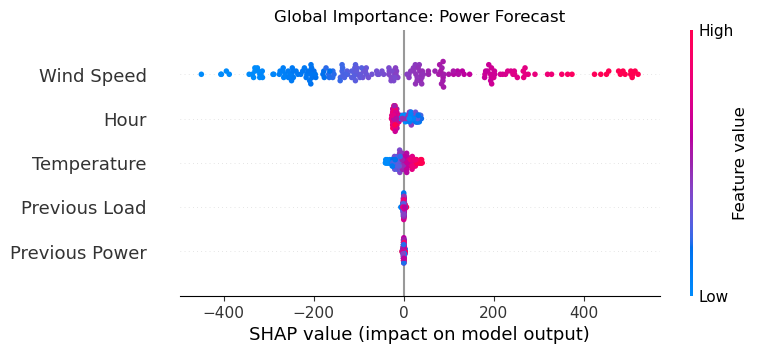

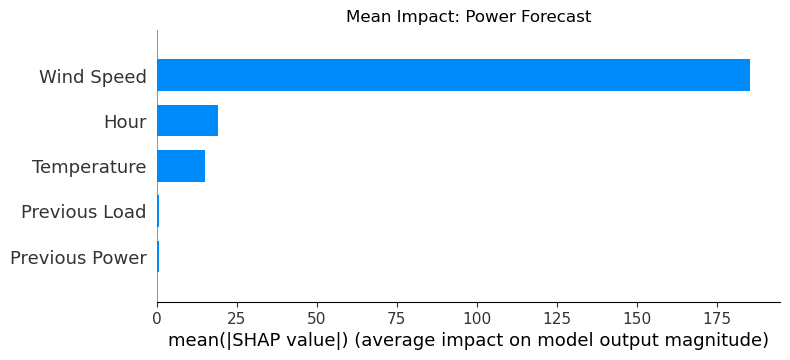

In [2]:

# Process data for target 0
current_shap_raw = np.array(all_shap_dict[0])
s_flat, d_flat, names = get_flattened_data(current_shap_raw)

print(f"Generating plots for: Power Forecast")

# 1. Summary Plot
plt.figure()
shap.summary_plot(s_flat, d_flat, feature_names=names, show=False)
plt.title(f"Global Importance: Power Forecast")
plt.show()

# 2. Bar Plot
plt.figure()
shap.summary_plot(s_flat, d_flat, feature_names=names, plot_type='bar', show=False)
plt.title(f"Mean Impact: Power Forecast")
plt.show()


--- 
# Analysis for: **Load Forecast**

Generating plots for: Load Forecast


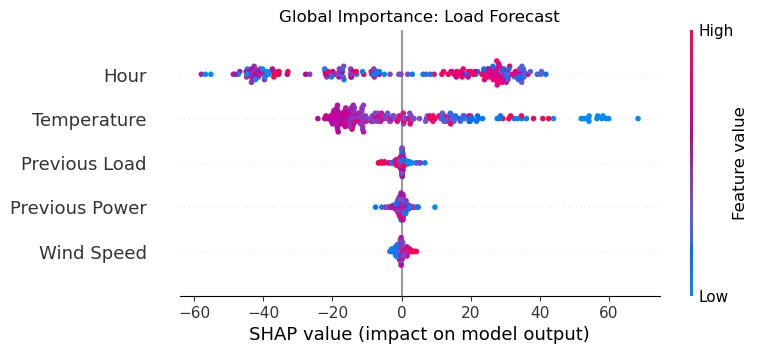

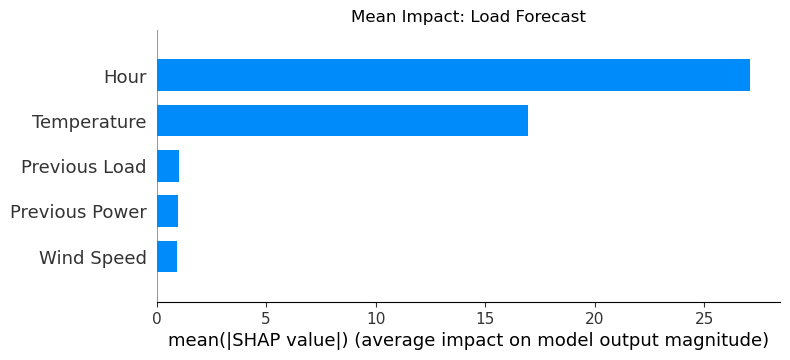

In [3]:

# Process data for target 1
current_shap_raw = np.array(all_shap_dict[1])
s_flat, d_flat, names = get_flattened_data(current_shap_raw)

print(f"Generating plots for: Load Forecast")

# 1. Summary Plot
plt.figure()
shap.summary_plot(s_flat, d_flat, feature_names=names, show=False)
plt.title(f"Global Importance: Load Forecast")
plt.show()

# 2. Bar Plot
plt.figure()
shap.summary_plot(s_flat, d_flat, feature_names=names, plot_type='bar', show=False)
plt.title(f"Mean Impact: Load Forecast")
plt.show()
